In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns", None)

In [274]:
# Data between 1987-2017, daily
df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/notebooks/data%20between%201987%20and%202017.csv')

In [275]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Close SP500         7500 non-null   float64       
 1   Open SP500          7500 non-null   float64       
 2   High SP500          7500 non-null   float64       
 3   Low SP500           7500 non-null   float64       
 4   Volume SP500        7500 non-null   float64       
 5   Interest Rate       7500 non-null   float64       
 6   Unemployment Rate   7500 non-null   float64       
 7   Inflation Rate      7500 non-null   float64       
 8   CPIAUCSL            7500 non-null   float64       
 9   Open RUSSELL2000    7500 non-null   float64       
 10  High RUSSELL2000    7500 non-null   float64       
 11  Low RUSSELL2000     7500 non-null   float64       
 12  Close RUSSELL2000   7500 non-null   float64       
 13  Volume RUSSELL2000  7500 non-null   float64     

In [276]:
# Calculate the difference between the Open and Close value on the same day
df['OPEN_CLOSE_CHANGE_%_SP500'] = (df['Close SP500'] - df['Open SP500']) / df['Open SP500']
df['OPEN_CLOSE_CHANGE_%_RUSSELL2000'] = (df['Close RUSSELL2000'] - df['Open RUSSELL2000']) / df['Open RUSSELL2000']
df['OPEN_CLOSE_CHANGE_%_Gold'] = (df['Close Gold'] - df['Open Gold']) / df['Open Gold']

# Calculate other changes PERCENT
df['Interest_Rate_Change'] = df['Interest Rate'].diff()
df['Inflation_Rate_Change'] = df['Inflation Rate'].diff()
df['Unemployment_Rate_Change'] = df['Unemployment Rate'].diff()
df['CPI_Change'] = df['CPIAUCSL'].diff()

In [277]:
# Calculate the difference between the Open and Close value on the same day
df['OPEN_CLOSE_CHANGE_ABB_SP500'] = (df['Close SP500'] - df['Open SP500'])
df['OPEN_CLOSE_CHANGE_ABB_RUSSELL2000'] = (df['Close RUSSELL2000'] - df['Open RUSSELL2000'])
df['OPEN_CLOSE_CHANGE_ABB_Gold'] = (df['Close Gold'] - df['Open Gold'])

In [278]:
df.columns

Index(['Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold', 'Interest_Rate_Change',
       'Inflation_Rate_Change', 'Unemployment_Rate_Change', 'CPI_Change',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold'],
      dtype='object')

In [279]:
# Sæt 'Date' som index, da det er nødvendigt for resampling
df.set_index('Date', inplace=True)

In [280]:
# Skab et dataset baseret på uge data
df_monthly_test = df.resample('M').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'OPEN_CLOSE_CHANGE_ABB_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_ABB_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

df_monthly_test.reset_index()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_86449/2227984504.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_test = df.resample('M').agg({


,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,OPEN_CLOSE_CHANGE_ABB_SP500,OPEN_CLOSE_CHANGE_ABB_RUSSELL2000,OPEN_CLOSE_CHANGE_ABB_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-10-31,8.054483,9.257685,6.158590,7.088962,1.314834e+08,7.29,6.0,4.3,115.000,170.820007,172.619995,105.459999,118.260002,6.094500e+09,18.80,468.67,2.502811,-0.312582,-0.139586,17.796987,-49.510019,-66.45,0.0,0.0,0.0,0.0
1,1987-11-30,6.308780,7.252987,6.390063,6.562143,7.877067e+07,6.69,5.8,4.4,115.400,110.790001,122.050003,107.900002,111.699997,3.892920e+09,17.70,490.46,2.285427,0.012328,-0.109561,14.273253,0.929994,-51.78,0.0,0.0,0.0,0.0
2,1987-12-31,5.966937,7.125270,6.242663,6.903975,7.832054e+07,6.77,5.7,4.2,115.600,111.690002,121.589996,106.160004,120.419998,3.926750e+09,17.60,485.85,2.405842,0.077472,-0.143570,14.640543,8.750015,-70.46,0.0,0.0,0.0,0.0
3,1988-01-31,6.282613,7.349375,6.715912,7.262558,8.398902e+07,6.83,5.7,4.3,116.000,119.500000,128.190002,118.610001,125.239998,3.664840e+09,16.28,454.01,1.642874,0.048788,-0.150805,10.691478,5.750007,-72.26,0.0,0.0,0.0,0.0
4,1988-02-29,6.786893,7.539957,7.035612,7.494760,6.277612e+07,6.58,5.7,4.3,116.200,125.239998,137.690002,124.940002,136.100006,3.693240e+09,14.73,430.23,1.501010,0.083310,-0.157410,10.170474,10.829993,-70.33,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2016-08-31,82.210412,83.342747,80.943192,81.887120,1.148668e+08,0.40,4.9,2.3,240.545,1220.300049,1251.329956,1198.729980,1239.910034,7.561031e+10,47.94,1308.95,-0.002812,0.015066,-0.031039,-0.239765,17.990113,-41.83,0.0,0.0,0.0,0.0
347,2016-09-30,81.978999,83.015212,79.445760,81.817914,1.253810e+08,0.40,4.9,2.2,241.176,1240.069946,1263.459961,1206.069946,1251.650024,7.727024e+10,48.24,1315.96,0.005790,0.007499,0.007689,0.426216,7.819944,9.51,0.0,0.0,0.0,0.0
348,2016-10-31,81.578648,82.419012,78.303508,79.321107,1.230605e+08,0.40,4.8,2.1,241.741,1239.930054,1255.709961,1185.170044,1191.390015,7.736997e+10,46.20,1277.38,-0.035196,-0.040479,-0.039491,-2.846375,-49.860109,-52.16,0.0,0.0,0.0,0.0
349,2016-11-30,79.320710,83.598955,77.106245,82.300365,1.490539e+08,0.41,4.6,2.1,242.026,1191.770020,1347.199951,1156.079956,1322.339966,8.829976e+10,47.95,1173.11,0.027326,0.098549,-0.072156,2.193403,121.889771,-88.92,0.0,0.0,0.0,0.0


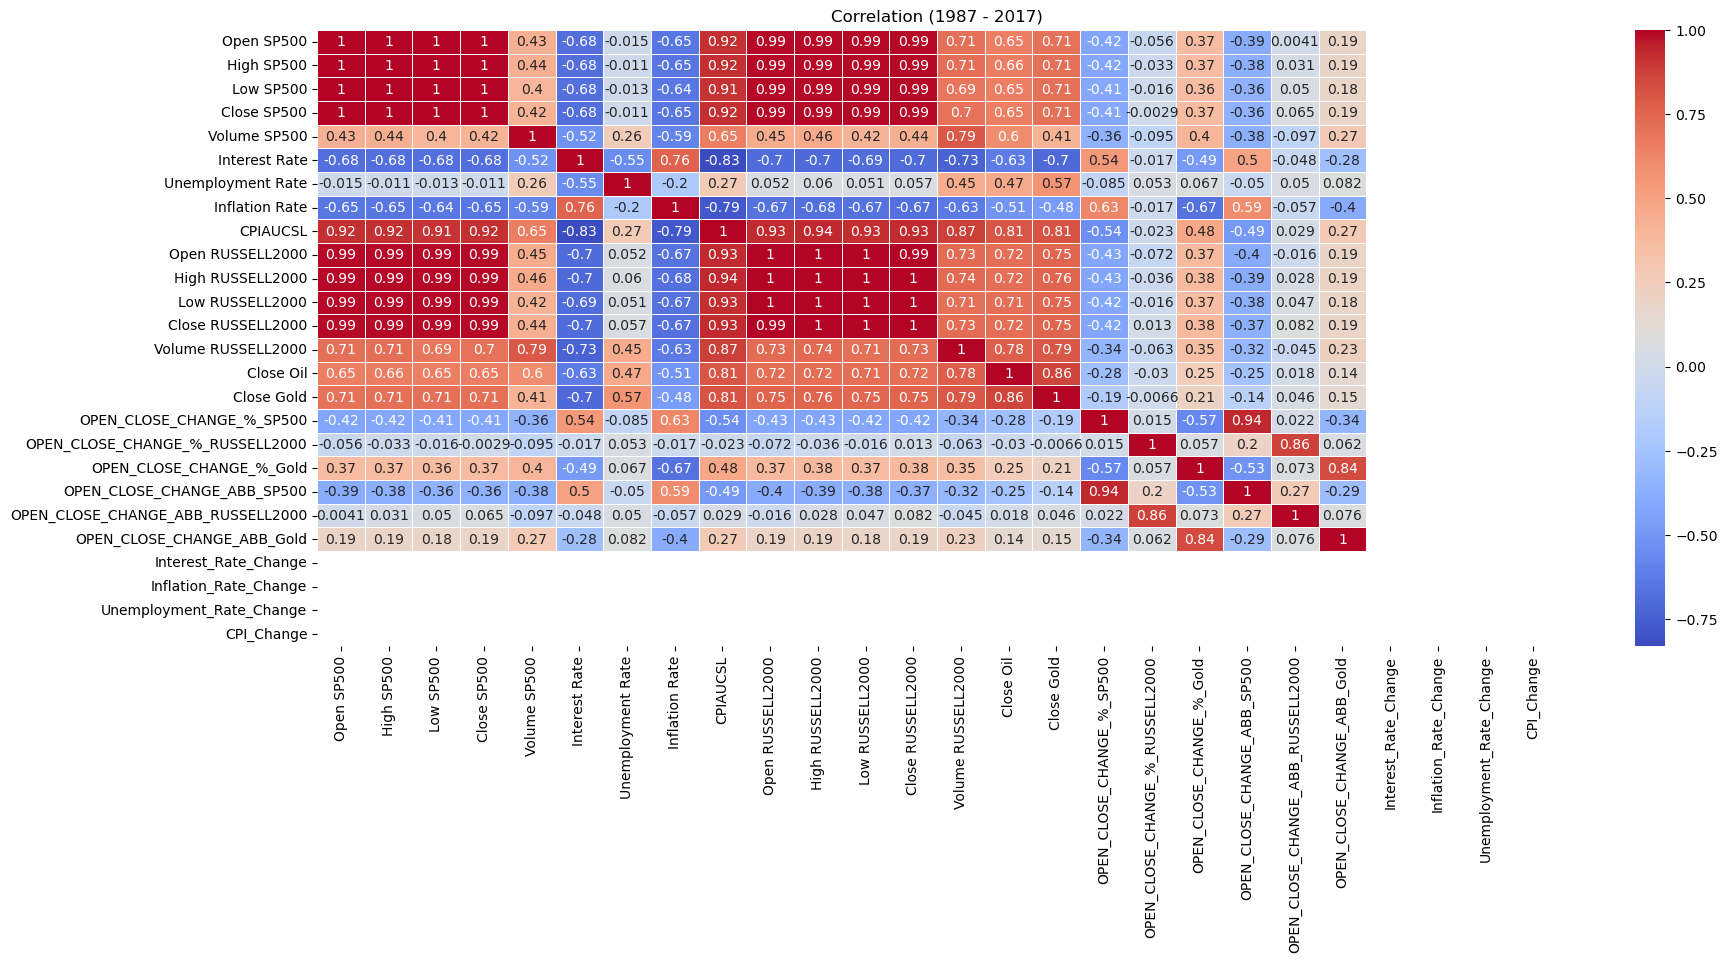

In [281]:
correlation_matrix = df_monthly_test.corr()

plt.figure(figsize=(20, 8))
corrmatt_after_1987_till_2017 = df_monthly_test.corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

In [282]:


# Skab et dataset baseret på uge data
df_weekly = df.resample('W').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

In [283]:
# Skab et dataset baseret på uge data
df_yearly = df.resample('Y').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_86449/1059874296.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').agg({


In [284]:
df_yearly = df_yearly.reset_index()
df_yearly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-12-31,8.054483,9.257685,6.158590,6.903975,2.885746e+08,6.77,5.7,4.2,115.600,170.820007,172.619995,105.459999,120.419998,1.391417e+10,17.60,485.85,7.194080,-0.222782,-0.392717,0.0,0.0,0.0,0.0
1,1988-12-31,6.282613,7.850352,6.715912,7.575482,7.905820e+08,8.76,5.3,4.7,120.700,119.500000,151.699997,118.610001,147.369995,4.146939e+10,16.23,409.39,17.889755,0.242785,-1.536667,0.0,0.0,0.0,0.0
2,1989-12-31,7.169046,9.464507,7.445674,9.264499,8.327567e+08,8.45,5.4,4.4,126.300,145.699997,180.949997,145.619995,168.309998,4.231955e+10,21.05,403.05,14.510837,0.164188,-1.558370,0.0,0.0,0.0,0.0
3,1990-12-31,8.718901,9.554994,7.494334,8.502323,8.745706e+08,7.31,6.3,5.2,134.200,166.270004,171.080002,118.449997,132.199997,4.038783e+10,28.35,393.00,6.130288,-0.206084,-2.078675,0.0,0.0,0.0,0.0
4,1991-12-31,8.322829,11.070053,7.967199,10.950187,9.585961e+08,4.43,7.3,4.4,138.200,130.440002,189.940002,124.519997,189.940002,4.582862e+10,17.75,354.30,4.080252,0.400486,-1.446601,0.0,0.0,0.0,0.0
5,1992-12-31,10.877297,11.709996,10.078750,11.565738,8.322583e+08,2.92,7.4,3.3,142.300,187.830002,221.009995,183.399994,221.009995,5.201388e+10,17.85,333.15,0.149131,0.155880,-0.512625,0.0,0.0,0.0,0.0
6,1993-12-31,11.597647,12.960315,11.306146,12.578782,9.692916e+08,2.96,6.5,3.2,146.300,218.429993,260.410004,216.429993,258.589996,6.727646e+10,13.18,390.75,0.061971,0.176920,0.193942,0.0,0.0,0.0,0.0
7,1994-12-31,12.587885,13.024287,11.616040,12.334623,8.811034e+08,5.45,5.5,2.6,150.100,256.190002,271.079987,233.889999,250.360001,7.466143e+10,16.23,382.85,-0.022558,0.002282,-0.014354,0.0,0.0,0.0,0.0
8,1995-12-31,12.338926,16.028816,12.163006,15.931827,1.010162e+09,5.60,5.6,3.0,153.900,246.889999,316.980011,246.380005,315.970001,8.857164e+10,18.65,387.10,0.279169,0.271508,-0.006069,0.0,0.0,0.0,0.0
9,1996-12-31,15.853213,19.051322,15.256954,18.615972,9.185547e+08,5.29,5.4,2.6,159.100,313.989990,364.959991,299.450012,362.609985,1.051164e+11,23.90,368.05,0.141271,0.156045,-0.053575,0.0,0.0,0.0,0.0


In [285]:
df_weekly = df_weekly.reset_index()

In [286]:
df_weekly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-10-04,8.054483,9.257685,8.954092,9.175296,7.768236e+06,7.29,6.0,4.3,115.000,170.820007,172.089996,170.250000,172.080002,3.823000e+08,18.65,454.87,0.258136,0.007363,-0.006058,0.0,0.0,0.0,0.0
1,1987-10-11,8.191843,9.256174,8.759207,8.807021,2.005927e+07,7.29,6.0,4.3,115.000,172.089996,172.619995,166.009995,166.119995,8.786000e+08,18.60,461.37,0.563284,-0.035164,-0.012029,0.0,0.0,0.0,0.0
2,1987-10-18,7.828462,8.946082,8.040240,8.141451,2.527455e+07,7.29,6.0,4.3,115.000,166.110001,166.110001,152.610001,152.740005,1.123900e+09,19.00,467.20,0.542738,-0.082782,-0.021070,0.0,0.0,0.0,0.0
3,1987-10-25,6.764206,7.913957,6.158590,7.056312,4.500350e+07,7.29,6.0,4.3,115.000,152.740005,152.740005,120.209999,121.589996,2.299800e+09,18.98,473.15,0.528340,-0.210957,-0.070327,0.0,0.0,0.0,0.0
4,1987-11-01,6.030389,7.252987,6.340609,7.088962,4.015610e+07,6.69,5.8,4.4,115.400,121.580002,121.580002,105.459999,118.260002,1.713300e+09,18.80,468.67,0.733979,0.076384,-0.031019,-0.6,0.1,-0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2016-12-04,82.843713,83.598955,81.061983,81.863390,3.398484e+07,0.54,4.7,2.2,242.637,1346.880005,1346.880005,1308.849976,1314.250000,2.158943e+10,52.35,1176.92,-0.015374,-0.025773,-0.005131,0.0,0.0,0.0,0.0
1523,2016-12-11,82.245443,85.027028,81.599321,84.340678,3.252160e+07,0.54,4.7,2.2,242.637,1314.979980,1392.709961,1314.979980,1388.069946,2.033743e+10,52.19,1157.87,0.021442,0.054548,-0.020665,0.0,0.0,0.0,0.0
1524,2016-12-18,84.306176,85.317837,83.015543,83.784324,3.828856e+07,0.54,4.7,2.2,242.637,1387.780029,1388.530029,1354.069946,1364.189941,2.238761e+10,54.15,1134.09,-0.011261,-0.016770,-0.021412,0.0,0.0,0.0,0.0
1525,2016-12-25,83.847430,84.825433,83.162482,83.971982,2.574295e+07,0.54,4.7,2.2,242.637,1364.780029,1385.060059,1360.250000,1371.510010,1.429625e+10,53.93,1133.49,0.000058,0.005200,-0.001097,0.0,0.0,0.0,0.0


In [287]:
# Skab et dataset baseret på uge data
df_monthly = df.resample('M').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_86449/1802863247.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').agg({


In [288]:
df_monthly = df_monthly.reset_index()

In [289]:
df_monthly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-10-31,8.054483,9.257685,6.158590,7.088962,1.314834e+08,7.29,6.0,4.3,115.000,170.820007,172.619995,105.459999,118.260002,6.094500e+09,18.80,468.67,2.502811,-0.312582,-0.139586,0.0,0.0,0.0,0.0
1,1987-11-30,6.308780,7.252987,6.390063,6.562143,7.877067e+07,6.69,5.8,4.4,115.400,110.790001,122.050003,107.900002,111.699997,3.892920e+09,17.70,490.46,2.285427,0.012328,-0.109561,0.0,0.0,0.0,0.0
2,1987-12-31,5.966937,7.125270,6.242663,6.903975,7.832054e+07,6.77,5.7,4.2,115.600,111.690002,121.589996,106.160004,120.419998,3.926750e+09,17.60,485.85,2.405842,0.077472,-0.143570,0.0,0.0,0.0,0.0
3,1988-01-31,6.282613,7.349375,6.715912,7.262558,8.398902e+07,6.83,5.7,4.3,116.000,119.500000,128.190002,118.610001,125.239998,3.664840e+09,16.28,454.01,1.642874,0.048788,-0.150805,0.0,0.0,0.0,0.0
4,1988-02-29,6.786893,7.539957,7.035612,7.494760,6.277612e+07,6.58,5.7,4.3,116.200,125.239998,137.690002,124.940002,136.100006,3.693240e+09,14.73,430.23,1.501010,0.083310,-0.157410,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2016-08-31,82.210412,83.342747,80.943192,81.887120,1.148668e+08,0.40,4.9,2.3,240.545,1220.300049,1251.329956,1198.729980,1239.910034,7.561031e+10,47.94,1308.95,-0.002812,0.015066,-0.031039,0.0,0.0,0.0,0.0
347,2016-09-30,81.978999,83.015212,79.445760,81.817914,1.253810e+08,0.40,4.9,2.2,241.176,1240.069946,1263.459961,1206.069946,1251.650024,7.727024e+10,48.24,1315.96,0.005790,0.007499,0.007689,0.0,0.0,0.0,0.0
348,2016-10-31,81.578648,82.419012,78.303508,79.321107,1.230605e+08,0.40,4.8,2.1,241.741,1239.930054,1255.709961,1185.170044,1191.390015,7.736997e+10,46.20,1277.38,-0.035196,-0.040479,-0.039491,0.0,0.0,0.0,0.0
349,2016-11-30,79.320710,83.598955,77.106245,82.300365,1.490539e+08,0.41,4.6,2.1,242.026,1191.770020,1347.199951,1156.079956,1322.339966,8.829976e+10,47.95,1173.11,0.027326,0.098549,-0.072156,0.0,0.0,0.0,0.0


In [290]:
change_columns = [
    'Interest_Rate_Change', 'Inflation_Rate_Change', 'Unemployment_Rate_Change', 
    'CPI_Change', 'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000', 'OPEN_CLOSE_CHANGE_%_Gold'
]

# For ugentlige data
for col in change_columns:
    df_weekly[f'{col}_Flagged'] = (df_weekly[col] > 0).astype(int)

# For månedlige data
for col in change_columns:
    df_monthly[f'{col}_Flagged'] = (df_monthly[col] > 0).astype(int)

In [291]:
# For årligt data
for col in change_columns:
    df_yearly[f'{col}_Flagged'] = (df_yearly[col] > 0).astype(int)

In [292]:
df_weekly['Next_Week_SP500'] = df_weekly['OPEN_CLOSE_CHANGE_%_SP500_Flagged'].shift(-1)
df_weekly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,Interest_Rate_Change_Flagged,Inflation_Rate_Change_Flagged,Unemployment_Rate_Change_Flagged,CPI_Change_Flagged,OPEN_CLOSE_CHANGE_%_SP500_Flagged,OPEN_CLOSE_CHANGE_%_RUSSELL2000_Flagged,OPEN_CLOSE_CHANGE_%_Gold_Flagged,Next_Week_SP500
0,1987-10-04,8.054483,9.257685,8.954092,9.175296,7.768236e+06,7.29,6.0,4.3,115.000,170.820007,172.089996,170.250000,172.080002,3.823000e+08,18.65,454.87,0.258136,0.007363,-0.006058,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1.0
1,1987-10-11,8.191843,9.256174,8.759207,8.807021,2.005927e+07,7.29,6.0,4.3,115.000,172.089996,172.619995,166.009995,166.119995,8.786000e+08,18.60,461.37,0.563284,-0.035164,-0.012029,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
2,1987-10-18,7.828462,8.946082,8.040240,8.141451,2.527455e+07,7.29,6.0,4.3,115.000,166.110001,166.110001,152.610001,152.740005,1.123900e+09,19.00,467.20,0.542738,-0.082782,-0.021070,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
3,1987-10-25,6.764206,7.913957,6.158590,7.056312,4.500350e+07,7.29,6.0,4.3,115.000,152.740005,152.740005,120.209999,121.589996,2.299800e+09,18.98,473.15,0.528340,-0.210957,-0.070327,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
4,1987-11-01,6.030389,7.252987,6.340609,7.088962,4.015610e+07,6.69,5.8,4.4,115.400,121.580002,121.580002,105.459999,118.260002,1.713300e+09,18.80,468.67,0.733979,0.076384,-0.031019,-0.6,0.1,-0.2,0.4,0,1,0,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2016-12-04,82.843713,83.598955,81.061983,81.863390,3.398484e+07,0.54,4.7,2.2,242.637,1346.880005,1346.880005,1308.849976,1314.250000,2.158943e+10,52.35,1176.92,-0.015374,-0.025773,-0.005131,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0
1523,2016-12-11,82.245443,85.027028,81.599321,84.340678,3.252160e+07,0.54,4.7,2.2,242.637,1314.979980,1392.709961,1314.979980,1388.069946,2.033743e+10,52.19,1157.87,0.021442,0.054548,-0.020665,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0.0
1524,2016-12-18,84.306176,85.317837,83.015543,83.784324,3.828856e+07,0.54,4.7,2.2,242.637,1387.780029,1388.530029,1354.069946,1364.189941,2.238761e+10,54.15,1134.09,-0.011261,-0.016770,-0.021412,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0
1525,2016-12-25,83.847430,84.825433,83.162482,83.971982,2.574295e+07,0.54,4.7,2.2,242.637,1364.780029,1385.060059,1360.250000,1371.510010,1.429625e+10,53.93,1133.49,0.000058,0.005200,-0.001097,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0.0


In [293]:
new_monhtly = df_monthly.drop(columns=['Date', 'Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold'])

In [294]:
new_monhtly

,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,Interest_Rate_Change_Flagged,Inflation_Rate_Change_Flagged,Unemployment_Rate_Change_Flagged,CPI_Change_Flagged,OPEN_CLOSE_CHANGE_%_SP500_Flagged,OPEN_CLOSE_CHANGE_%_RUSSELL2000_Flagged,OPEN_CLOSE_CHANGE_%_Gold_Flagged
0,2.502811,-0.312582,-0.139586,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0
1,2.285427,0.012328,-0.109561,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
2,2.405842,0.077472,-0.143570,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
3,1.642874,0.048788,-0.150805,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
4,1.501010,0.083310,-0.157410,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,-0.002812,0.015066,-0.031039,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
347,0.005790,0.007499,0.007689,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1
348,-0.035196,-0.040479,-0.039491,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
349,0.027326,0.098549,-0.072156,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0


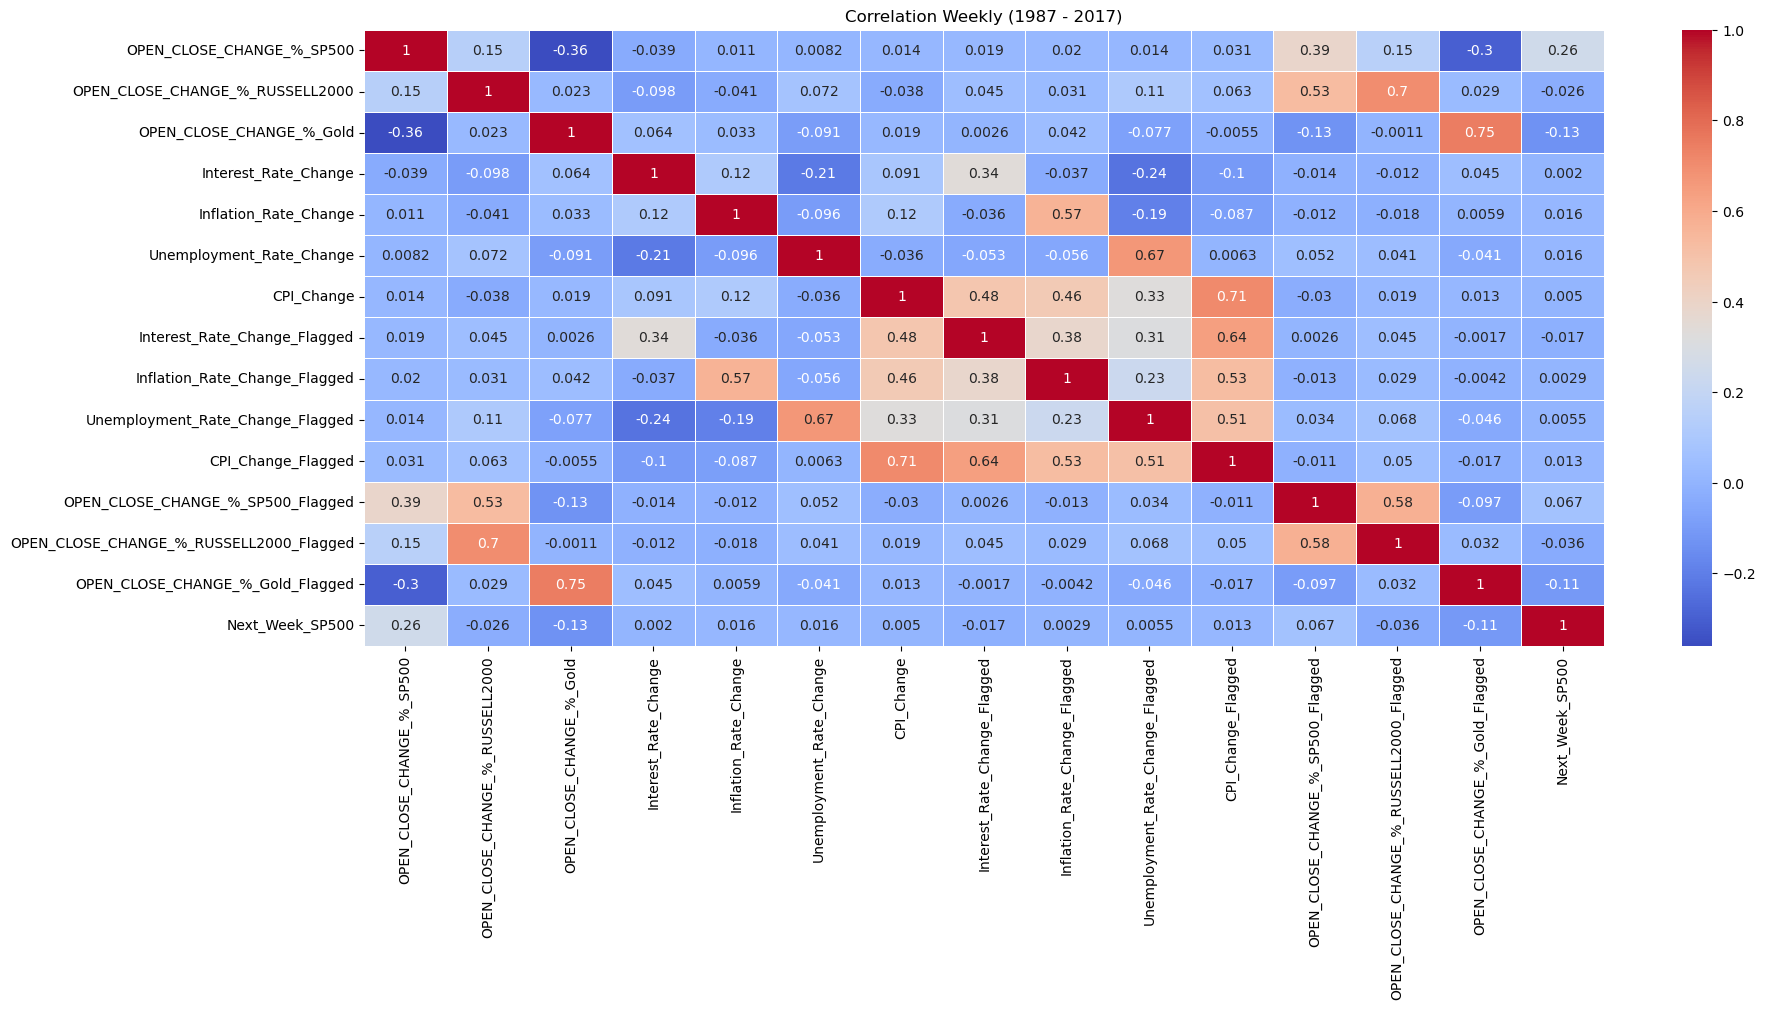

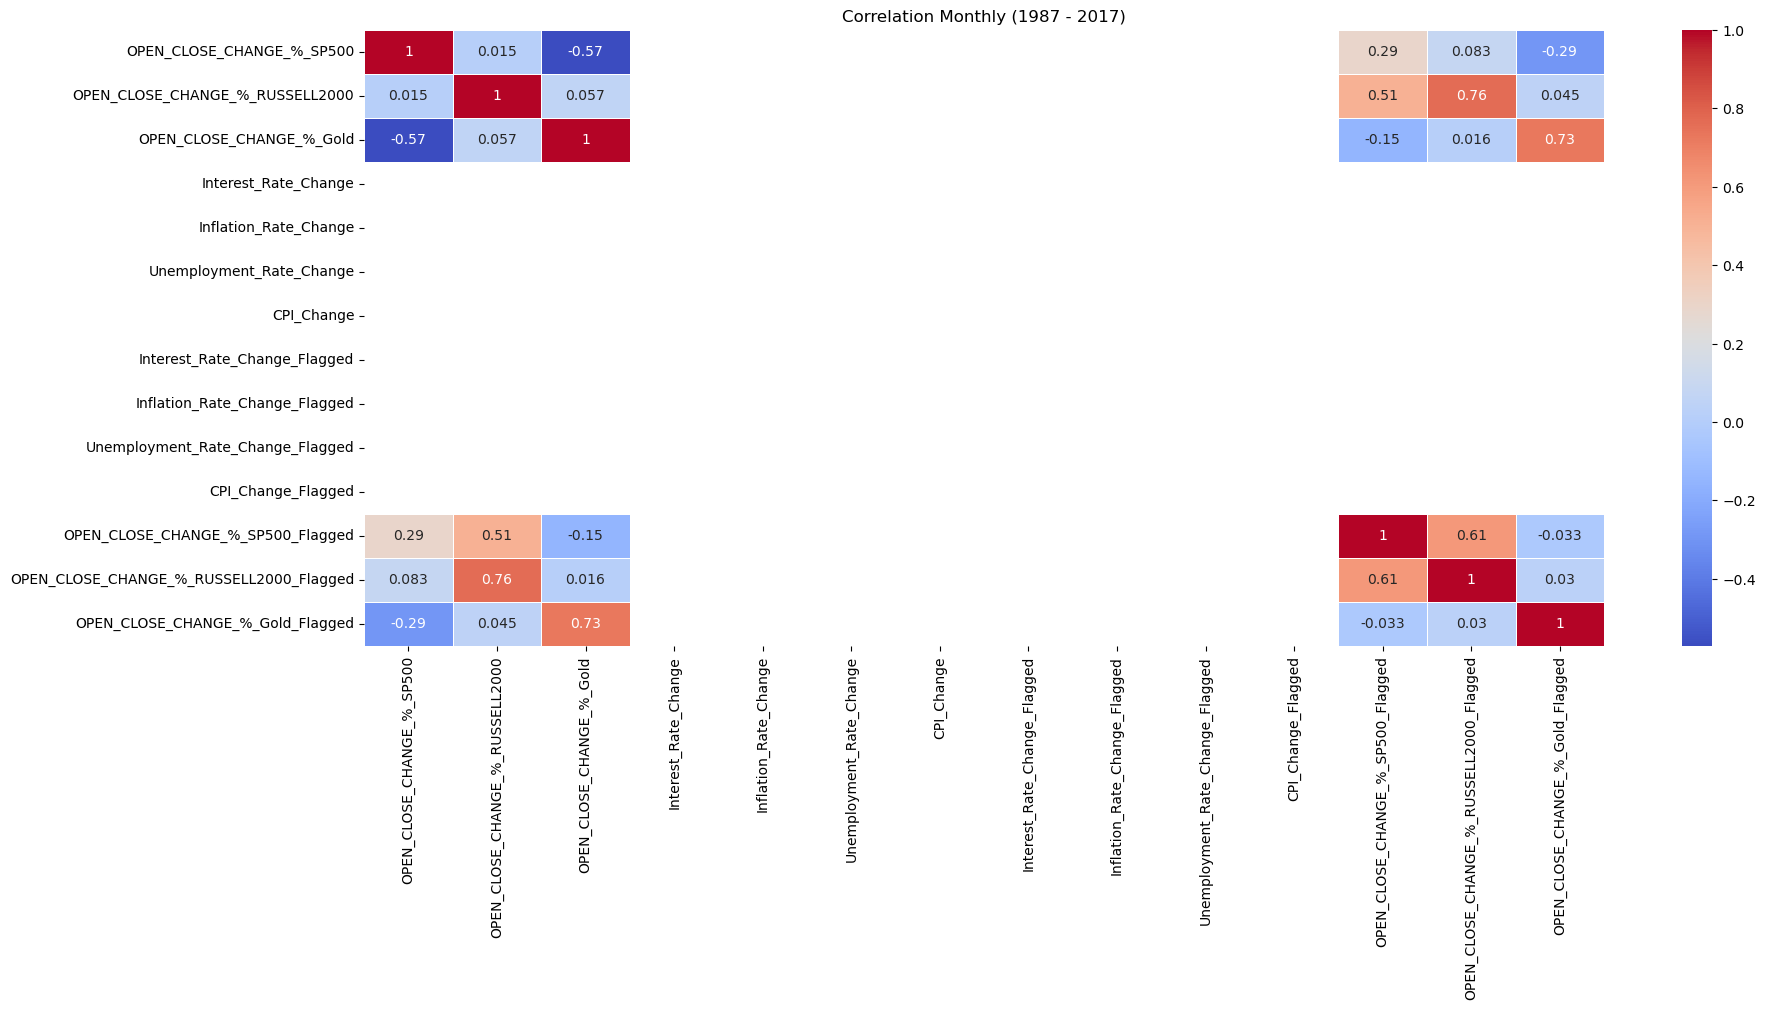

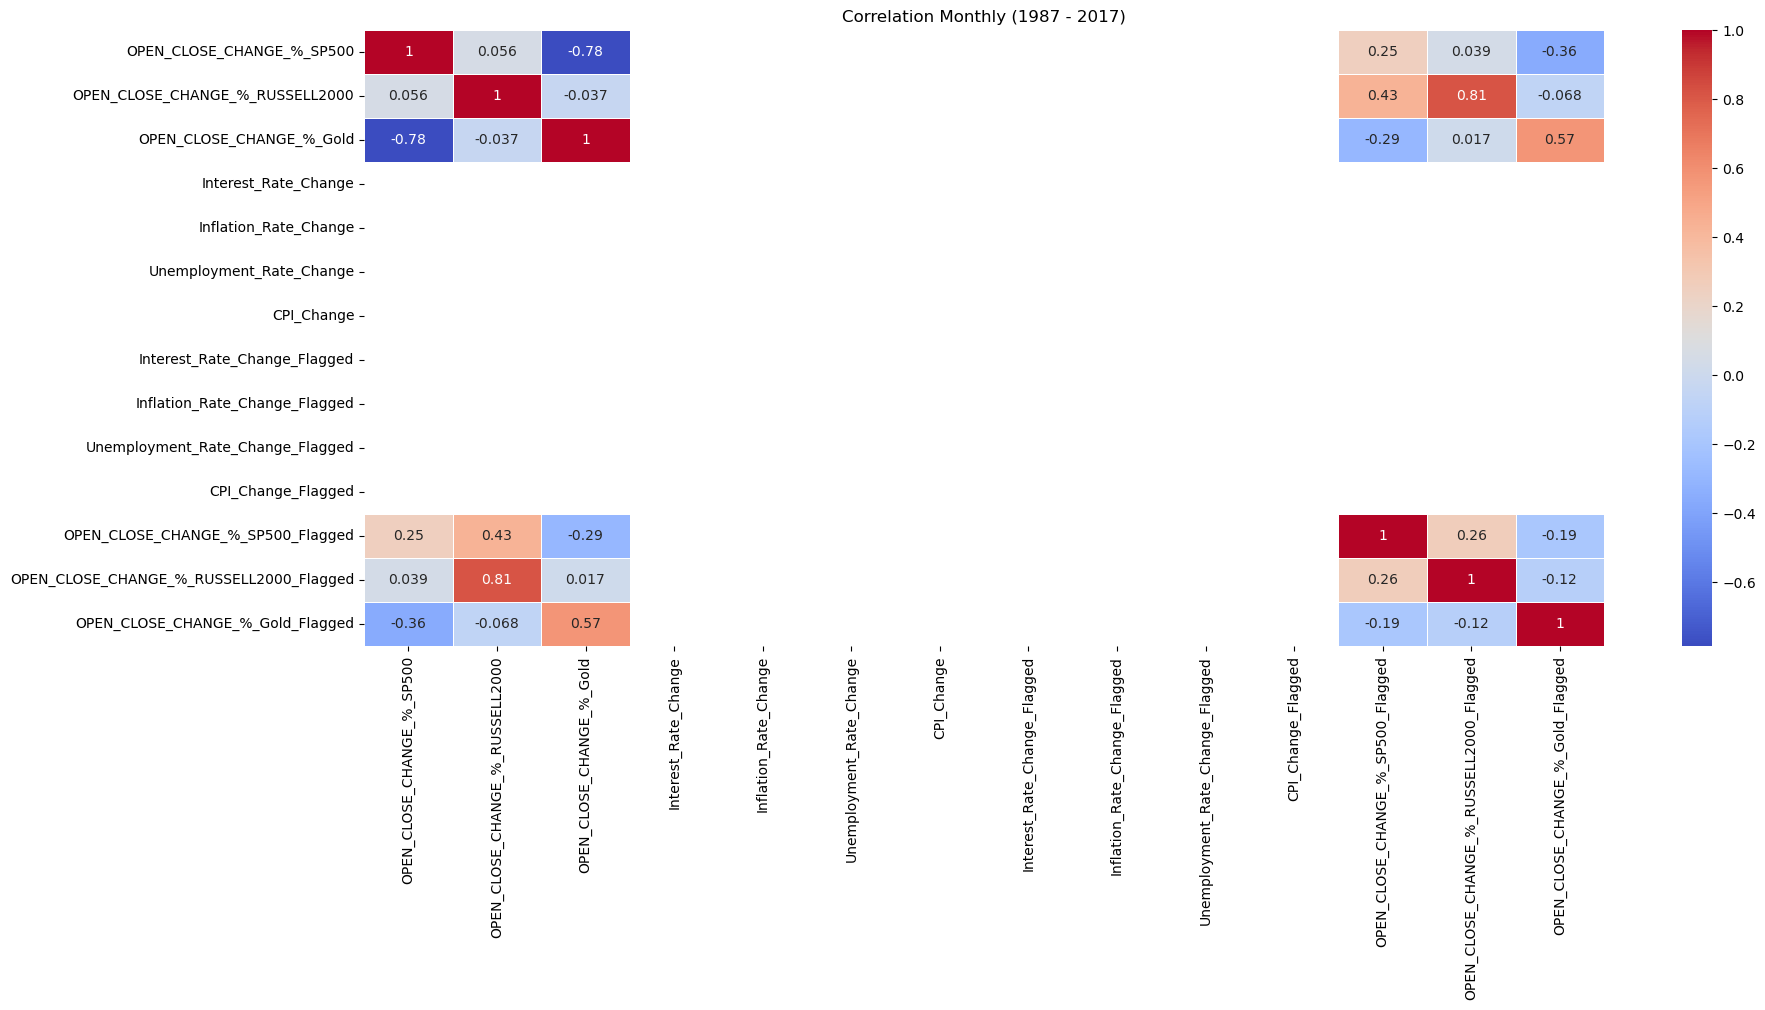

In [295]:
columns_to_drop = ['Date', 'Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold']

plt.figure(figsize=(20, 8))
corrmatt_weekly = df_weekly.drop(columns=columns_to_drop).corr()
sns.heatmap(corrmatt_weekly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Weekly (1987 - 2017)')
plt.show()

plt.figure(figsize=(20, 8))
corrmatt_monthly = new_monhtly.corr()
sns.heatmap(corrmatt_monthly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Monthly (1987 - 2017)')
plt.show()

plt.figure(figsize=(20, 8))
corrmatt_yearly = df_yearly.drop(columns=columns_to_drop).corr()
sns.heatmap(corrmatt_yearly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Monthly (1987 - 2017)')
plt.show()

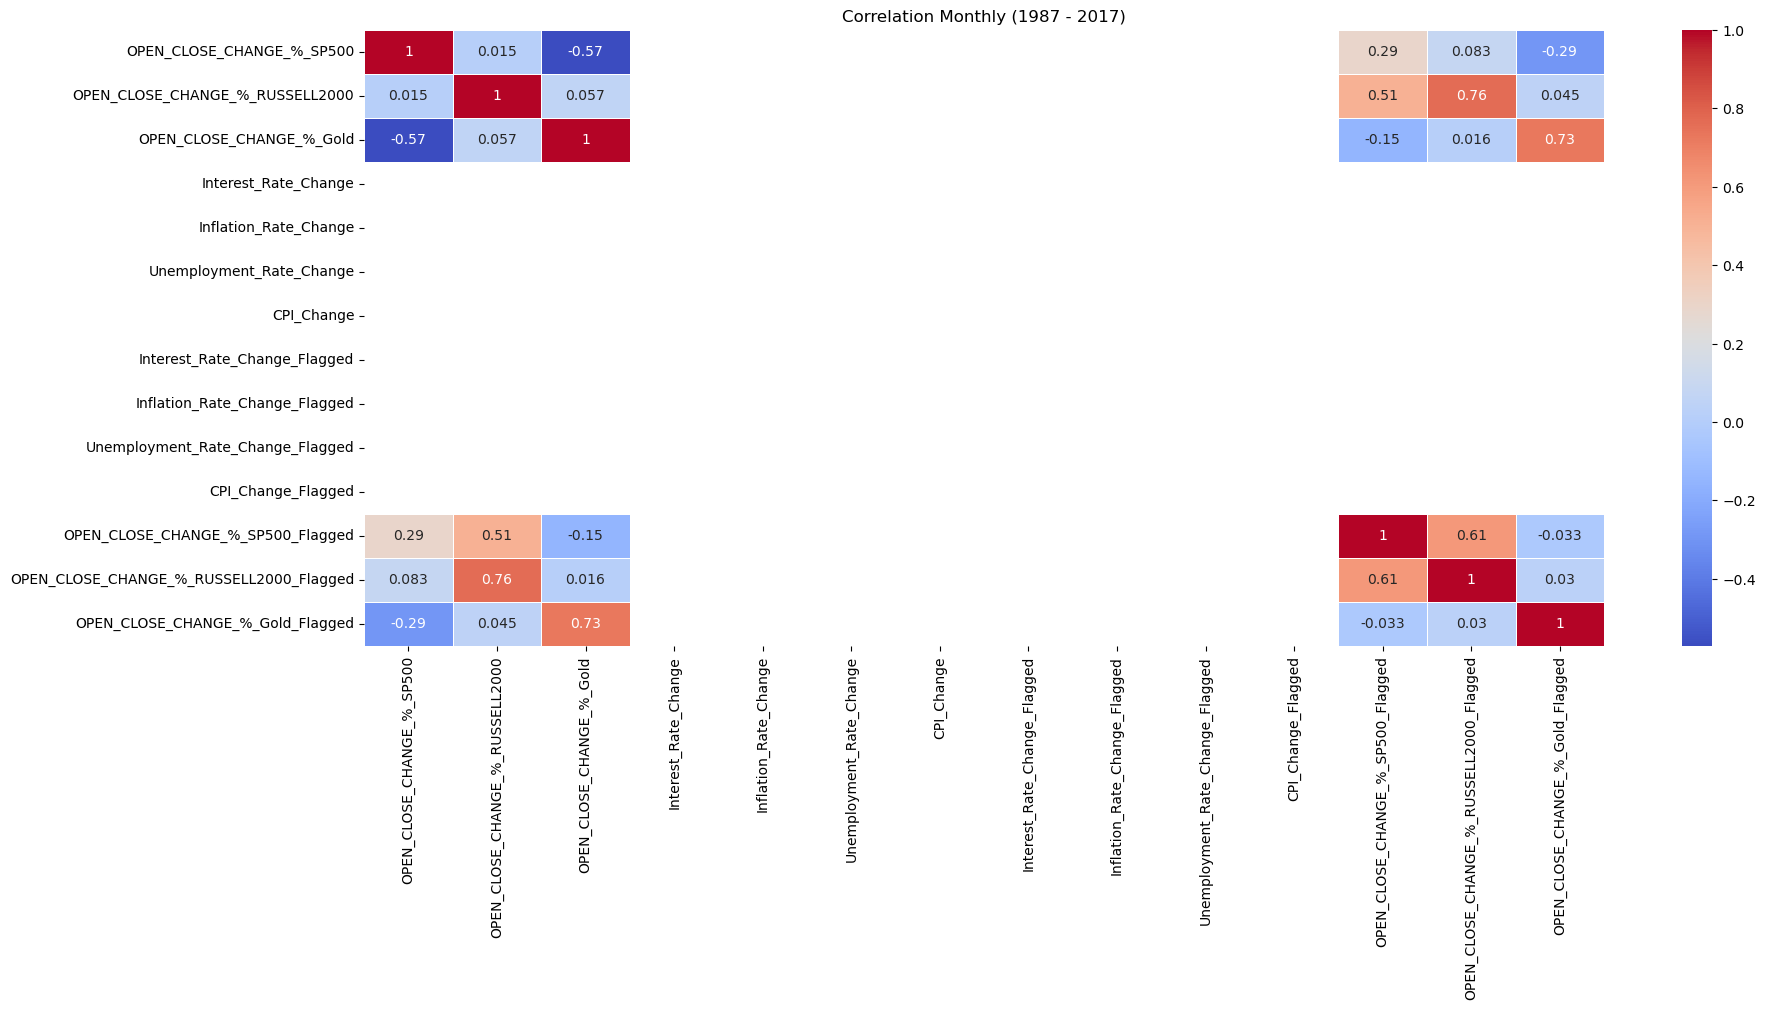

In [296]:
plt.figure(figsize=(20, 8))
corrmatt_monthly = new_monhtly.corr()
sns.heatmap(corrmatt_monthly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Monthly (1987 - 2017)')
plt.show()

# DecisionTree

In [297]:
df_monthly_test = df_monthly_test.reset_index()

In [298]:
df_monthly_test

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,OPEN_CLOSE_CHANGE_ABB_SP500,OPEN_CLOSE_CHANGE_ABB_RUSSELL2000,OPEN_CLOSE_CHANGE_ABB_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-10-31,8.054483,9.257685,6.158590,7.088962,1.314834e+08,7.29,6.0,4.3,115.000,170.820007,172.619995,105.459999,118.260002,6.094500e+09,18.80,468.67,2.502811,-0.312582,-0.139586,17.796987,-49.510019,-66.45,0.0,0.0,0.0,0.0
1,1987-11-30,6.308780,7.252987,6.390063,6.562143,7.877067e+07,6.69,5.8,4.4,115.400,110.790001,122.050003,107.900002,111.699997,3.892920e+09,17.70,490.46,2.285427,0.012328,-0.109561,14.273253,0.929994,-51.78,0.0,0.0,0.0,0.0
2,1987-12-31,5.966937,7.125270,6.242663,6.903975,7.832054e+07,6.77,5.7,4.2,115.600,111.690002,121.589996,106.160004,120.419998,3.926750e+09,17.60,485.85,2.405842,0.077472,-0.143570,14.640543,8.750015,-70.46,0.0,0.0,0.0,0.0
3,1988-01-31,6.282613,7.349375,6.715912,7.262558,8.398902e+07,6.83,5.7,4.3,116.000,119.500000,128.190002,118.610001,125.239998,3.664840e+09,16.28,454.01,1.642874,0.048788,-0.150805,10.691478,5.750007,-72.26,0.0,0.0,0.0,0.0
4,1988-02-29,6.786893,7.539957,7.035612,7.494760,6.277612e+07,6.58,5.7,4.3,116.200,125.239998,137.690002,124.940002,136.100006,3.693240e+09,14.73,430.23,1.501010,0.083310,-0.157410,10.170474,10.829993,-70.33,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2016-08-31,82.210412,83.342747,80.943192,81.887120,1.148668e+08,0.40,4.9,2.3,240.545,1220.300049,1251.329956,1198.729980,1239.910034,7.561031e+10,47.94,1308.95,-0.002812,0.015066,-0.031039,-0.239765,17.990113,-41.83,0.0,0.0,0.0,0.0
347,2016-09-30,81.978999,83.015212,79.445760,81.817914,1.253810e+08,0.40,4.9,2.2,241.176,1240.069946,1263.459961,1206.069946,1251.650024,7.727024e+10,48.24,1315.96,0.005790,0.007499,0.007689,0.426216,7.819944,9.51,0.0,0.0,0.0,0.0
348,2016-10-31,81.578648,82.419012,78.303508,79.321107,1.230605e+08,0.40,4.8,2.1,241.741,1239.930054,1255.709961,1185.170044,1191.390015,7.736997e+10,46.20,1277.38,-0.035196,-0.040479,-0.039491,-2.846375,-49.860109,-52.16,0.0,0.0,0.0,0.0
349,2016-11-30,79.320710,83.598955,77.106245,82.300365,1.490539e+08,0.41,4.6,2.1,242.026,1191.770020,1347.199951,1156.079956,1322.339966,8.829976e+10,47.95,1173.11,0.027326,0.098549,-0.072156,2.193403,121.889771,-88.92,0.0,0.0,0.0,0.0


In [299]:
df_monthly_test.columns

Index(['Date', 'Open SP500', 'High SP500', 'Low SP500', 'Close SP500',
       'Volume SP500', 'Interest Rate', 'Unemployment Rate', 'Inflation Rate',
       'CPIAUCSL', 'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold', 'OPEN_CLOSE_CHANGE_ABB_SP500',
       'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000', 'OPEN_CLOSE_CHANGE_ABB_Gold',
       'Interest_Rate_Change', 'Inflation_Rate_Change',
       'Unemployment_Rate_Change', 'CPI_Change'],
      dtype='object')

In [300]:
df_test_date = df_monthly_test.copy()

df_test_date['YearMonth'] = df_test_date['Date'].dt.strftime('%Y%m')
df_test_date['YearMonth'] = df_test_date['Date'].dt.strftime('%Y%m')

#df_monthly_test['Date'] = pd.to_datetime(df_monthly_test['Date']).dt.strftime('%Y%m%d').astype(int)

In [301]:
df_test_date['Year'] = df_test_date['Date'].dt.strftime('%Y')
df_test_date['Month'] = df_test_date['Date'].dt.strftime('%m')

In [321]:
df_test_date.tail()

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,OPEN_CLOSE_CHANGE_ABB_SP500,OPEN_CLOSE_CHANGE_ABB_RUSSELL2000,OPEN_CLOSE_CHANGE_ABB_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,YearMonth,Year,Month
346,2016-08-31,82.210412,83.342747,80.943192,81.887120,1.148668e+08,0.40,4.9,2.3,240.545,1220.300049,1251.329956,1198.729980,1239.910034,7.561031e+10,47.94,1308.95,-0.002812,0.015066,-0.031039,-0.239765,17.990113,-41.83,0.0,0.0,0.0,0.0,201608,2016,08
347,2016-09-30,81.978999,83.015212,79.445760,81.817914,1.253810e+08,0.40,4.9,2.2,241.176,1240.069946,1263.459961,1206.069946,1251.650024,7.727024e+10,48.24,1315.96,0.005790,0.007499,0.007689,0.426216,7.819944,9.51,0.0,0.0,0.0,0.0,201609,2016,09
348,2016-10-31,81.578648,82.419012,78.303508,79.321107,1.230605e+08,0.40,4.8,2.1,241.741,1239.930054,1255.709961,1185.170044,1191.390015,7.736997e+10,46.20,1277.38,-0.035196,-0.040479,-0.039491,-2.846375,-49.860109,-52.16,0.0,0.0,0.0,0.0,201610,2016,10
349,2016-11-30,79.320710,83.598955,77.106245,82.300365,1.490539e+08,0.41,4.6,2.1,242.026,1191.770020,1347.199951,1156.079956,1322.339966,8.829976e+10,47.95,1173.11,0.027326,0.098549,-0.072156,2.193403,121.889771,-88.92,0.0,0.0,0.0,0.0,201611,2016,11
350,2016-12-31,82.358183,85.317837,81.061983,83.177213,1.384500e+08,0.54,4.7,2.2,242.637,1322.760010,1392.709961,1308.849976,1357.130005,7.525124e+10,54.96,1151.85,-0.011145,0.025797,-0.024677,-0.957107,33.530152,-29.31,0.0,0.0,0.0,0.0,201612,2016,12


In [303]:
df_monthly_test = df_monthly_test.drop(columns=[#'Date', 'Open SP500', 'High SP500', 'Low SP500', 'Close SP500',
       'Volume SP500', #'Interest Rate', 'Inflation Rate',
       'Unemployment Rate',
       #'CPIAUCSL', 'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       #'Close RUSSELL2000', 'Volume RUSSELL2000',
       'Close Oil', 'Close Gold',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold',
       #'OPEN_CLOSE_CHANGE_ABB_SP500',
       #'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold',
       'Interest_Rate_Change', 'Inflation_Rate_Change',
       'Unemployment_Rate_Change', 'CPI_Change'])

In [304]:
df_monthly_test['SP500_Flagged'] = (df_monthly_test['OPEN_CLOSE_CHANGE_ABB_SP500'] > 0).astype(int)
df_monthly_test['Russell2000_Flagged'] = (df_monthly_test['OPEN_CLOSE_CHANGE_ABB_RUSSELL2000'] > 0).astype(int)

In [305]:
# Tilføj kolonne for 'Next Week SP500'
df_monthly_test['Next_Month_SP500'] = df_monthly_test['SP500_Flagged'].shift(-1)
df_monthly_test['Next_Month_Russell2000'] = df_monthly_test['Russell2000_Flagged'].shift(-1)



# Tjek om kolonnen er tilføjet korrekt
#print(df_monthly_test[['Close SP500', 'Next_Week_SP500']].head())


In [306]:
# Fjern de sidste rækker, der vil have NaN i 'Next_Week_SP500', da der ikke er data for ugen efter
df_monthly_test = df_monthly_test.dropna()

In [320]:
df_monthly_test.head(20)

,Date,Open SP500,High SP500,Low SP500,Close SP500,Interest Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,OPEN_CLOSE_CHANGE_ABB_SP500,OPEN_CLOSE_CHANGE_ABB_RUSSELL2000,SP500_Flagged,Russell2000_Flagged,Next_Month_SP500,Next_Month_Russell2000
0,1987-10-31,8.054483,9.257685,6.158590,7.088962,7.29,4.3,115.0,170.820007,172.619995,105.459999,118.260002,6.094500e+09,17.796987,-49.510019,1,0,1.0,1.0
1,1987-11-30,6.308780,7.252987,6.390063,6.562143,6.69,4.4,115.4,110.790001,122.050003,107.900002,111.699997,3.892920e+09,14.273253,0.929994,1,1,1.0,1.0
2,1987-12-31,5.966937,7.125270,6.242663,6.903975,6.77,4.2,115.6,111.690002,121.589996,106.160004,120.419998,3.926750e+09,14.640543,8.750015,1,1,1.0,1.0
3,1988-01-31,6.282613,7.349375,6.715912,7.262558,6.83,4.3,116.0,119.500000,128.190002,118.610001,125.239998,3.664840e+09,10.691478,5.750007,1,1,1.0,1.0
4,1988-02-29,6.786893,7.539957,7.035612,7.494760,6.58,4.3,116.2,125.239998,137.690002,124.940002,136.100006,3.693240e+09,10.170474,10.829993,1,1,1.0,1.0
5,1988-03-31,6.998284,7.741152,7.204424,7.318070,6.58,4.4,116.5,136.100006,143.380005,136.070007,142.149994,4.052970e+09,11.406032,6.000001,1,1,1.0,1.0
6,1988-04-30,6.785018,7.648226,7.128934,7.340133,6.87,4.3,117.2,140.039993,145.460007,139.509995,145.009995,3.400630e+09,10.664772,4.969984,1,1,1.0,0.0
7,1988-05-31,6.849059,7.406344,7.010746,7.366042,7.09,4.3,117.5,144.059998,145.529999,136.289993,141.369995,3.366990e+09,11.169406,-2.720032,1,0,1.0,1.0
8,1988-06-30,6.869787,7.835981,7.324051,7.712881,7.51,4.5,118.0,141.369995,151.300003,141.369995,151.300003,4.306710e+09,11.758036,9.889969,1,1,1.0,0.0
9,1988-07-31,7.170233,7.833411,7.342888,7.587813,7.75,4.5,118.5,151.289993,151.699997,148.410004,149.889999,3.338470e+09,10.637012,-1.470001,1,0,1.0,0.0


In [324]:
df_monthly_test.columns

Index(['Date', 'Open SP500', 'High SP500', 'Low SP500', 'Close SP500',
       'Interest Rate', 'Inflation Rate', 'CPIAUCSL', 'Open RUSSELL2000',
       'High RUSSELL2000', 'Low RUSSELL2000', 'Close RUSSELL2000',
       'Volume RUSSELL2000', 'OPEN_CLOSE_CHANGE_ABB_SP500',
       'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000', 'SP500_Flagged',
       'Russell2000_Flagged', 'Next_Month_SP500', 'Next_Month_Russell2000'],
      dtype='object')

Best n_splits: 11 with Average Accuracy: 0.66
Final Accuracy on last fold with best n_splits: 0.62


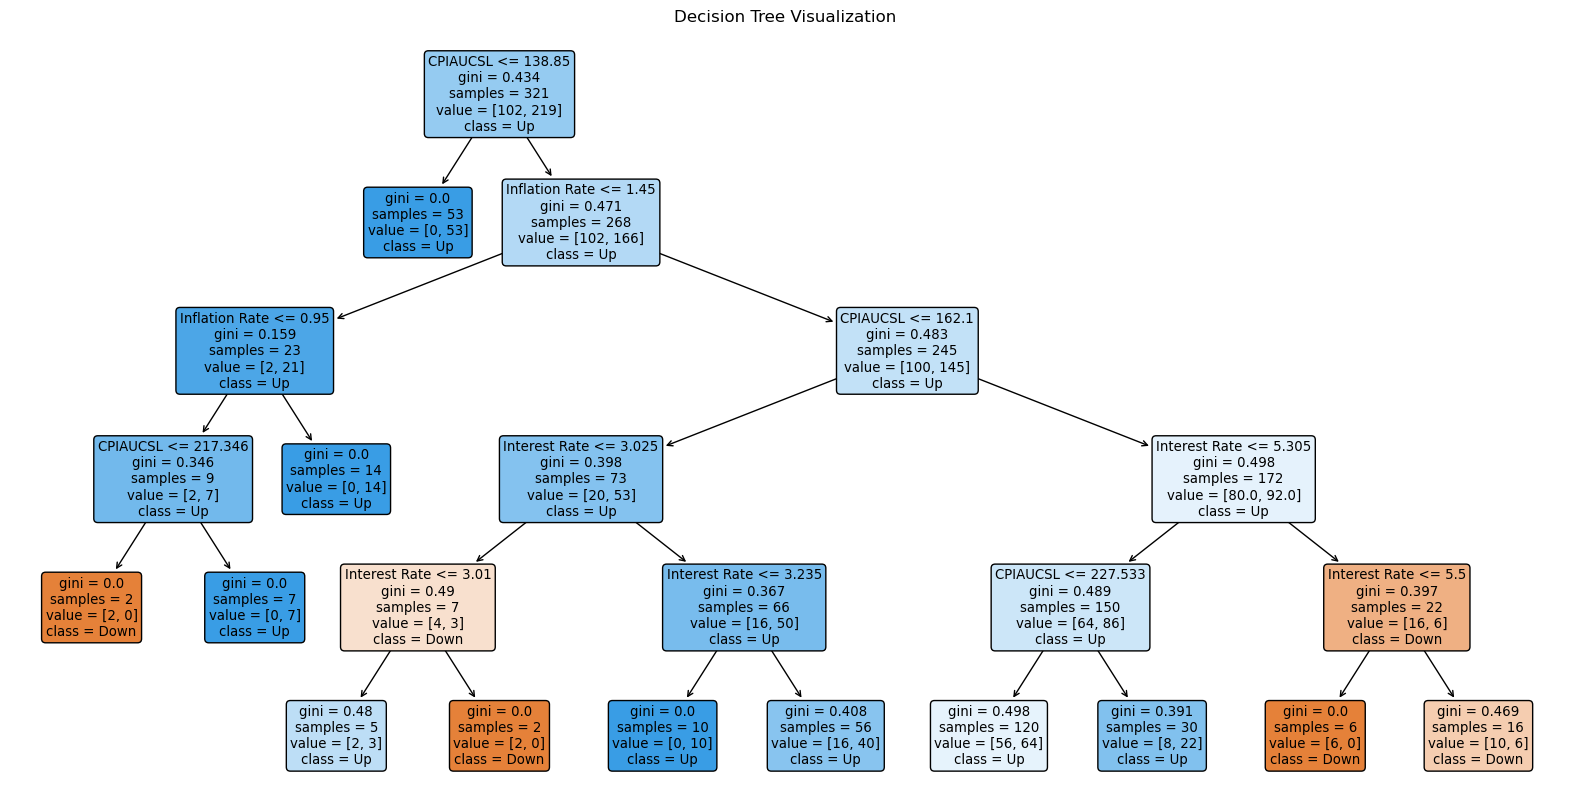

In [451]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np

# Kolonner, der ikke skal bruges i modellen
columns_to_drop_sp500 = ['Date', 'Open SP500', 'High SP500', 'Low SP500', 'Close SP500',
                         'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000', 'Close RUSSELL2000',
                         'Volume RUSSELL2000', 'OPEN_CLOSE_CHANGE_ABB_SP500', 
                         'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000', 'SP500_Flagged', 'Russell2000_Flagged',
                         'Next_Month_SP500', 'Next_Month_Russell2000']

# Fjern irrelevante kolonner og angiv den afhængige variabel
X = df_monthly_test.drop(columns=columns_to_drop_sp500)
y = df_monthly_test['SP500_Flagged']  # Målvariabel

# Initialiser variabler til at gemme resultater
best_n_splits = None
best_accuracy = 0
results = {}

# Test forskellige n_splits værdier
for n_splits in range(2, 20):  # Testing from 2 to 10 splits
    # Brug TimeSeriesSplit til at dele data i træning og test
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Initialiser Decision Tree-modellen
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

    # For at gemme resultater
    accuracies = []
    fold = 1

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Træn modellen
        dt_model.fit(X_train, y_train)
        
        # Forudsige på testdata
        y_pred = dt_model.predict(X_test)
        
        # Evaluer modellen
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        fold += 1

    # Beregn gennemsnitlig nøjagtighed for denne n_splits
    average_accuracy = np.mean(accuracies)
    results[n_splits] = average_accuracy
    
    # Opdater den bedste n_splits, hvis den nuværende er bedre
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_n_splits = n_splits

# Udskriv resultaterne
print(f"Best n_splits: {best_n_splits} with Average Accuracy: {best_accuracy:.2f}")

# Endelig træning med den bedste n_splits
tscv = TimeSeriesSplit(n_splits=best_n_splits)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Træn modellen
    dt_model.fit(X_train, y_train)
    
    # Forudsige på testdata
    y_pred = dt_model.predict(X_test)

# Udfør den endelige evaluering
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy on last fold with best n_splits: {accuracy:.2f}")

# Visualisér Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Down', 'Up'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [398]:
# Forudsige på testdata
y_pred = dt_model.predict(X_test)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6206896551724138

Fold 1 Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      1.00      0.95        26

    accuracy                           0.90        29
   macro avg       0.45      0.50      0.47        29
weighted avg       0.80      0.90      0.85        29


Confusion Matrix:
[[ 0  3]
 [ 0 26]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


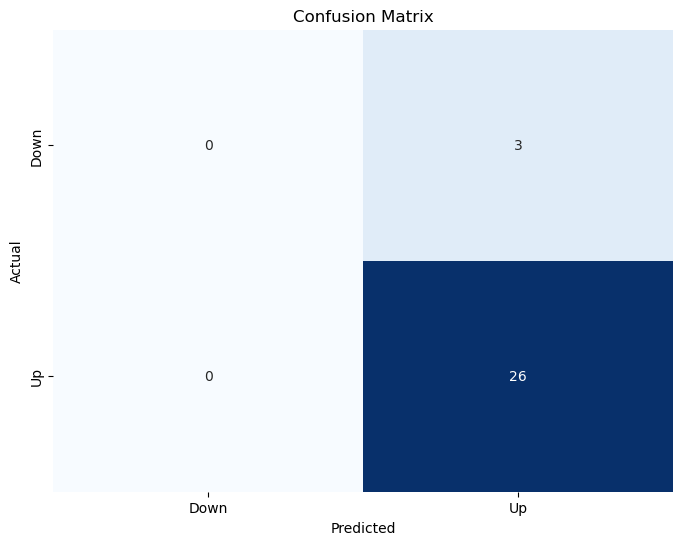

Fold 2 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        20

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[ 9  0]
 [ 0 20]]


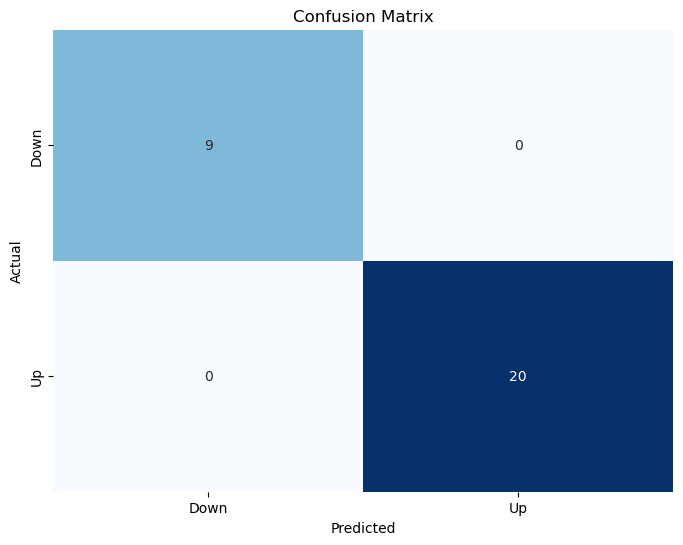

Fold 3 Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.92      1.00      0.96        23

    accuracy                           0.93        29
   macro avg       0.96      0.83      0.88        29
weighted avg       0.94      0.93      0.93        29


Confusion Matrix:
[[ 4  2]
 [ 0 23]]


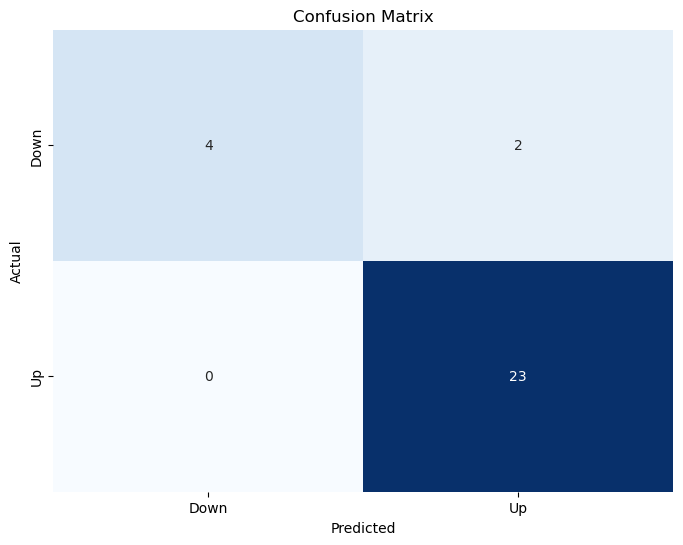

Fold 4 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[13  0]
 [ 0 16]]


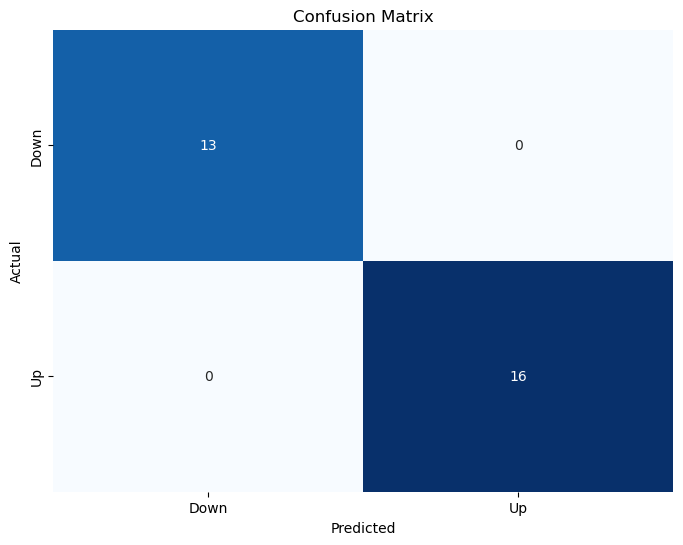

Fold 5 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[16  0]
 [ 0 13]]


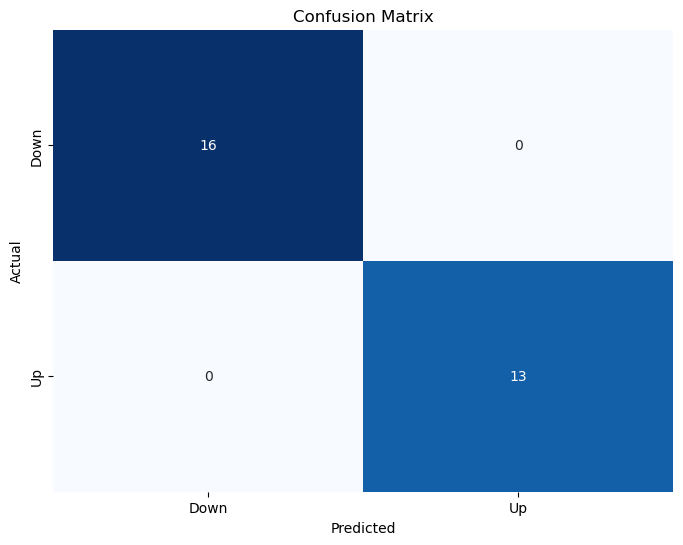

Fold 6 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        19

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[10  0]
 [ 0 19]]


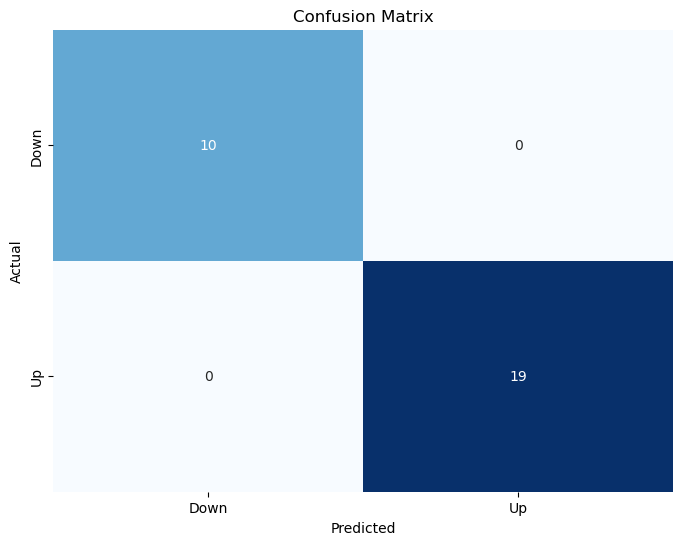

Fold 7 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        19

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[10  0]
 [ 0 19]]


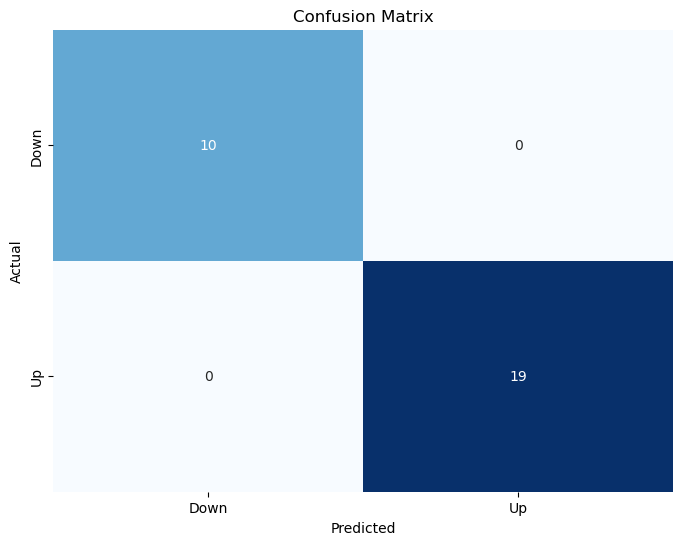

Fold 8 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[15  0]
 [ 0 14]]


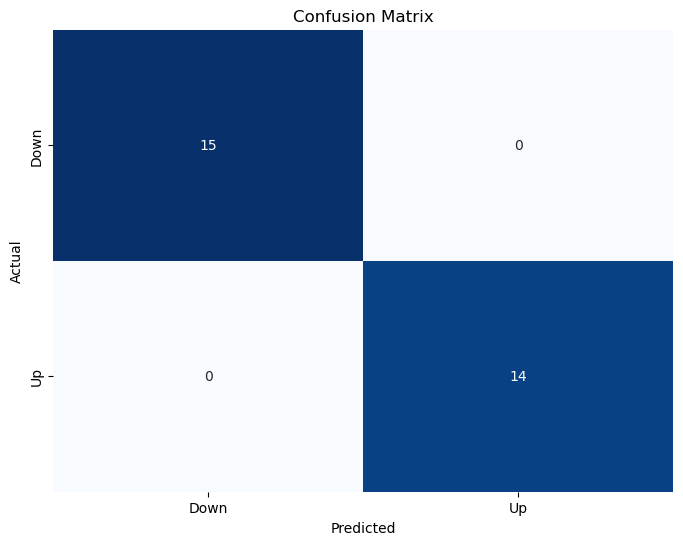

Fold 9 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[12  0]
 [ 0 17]]


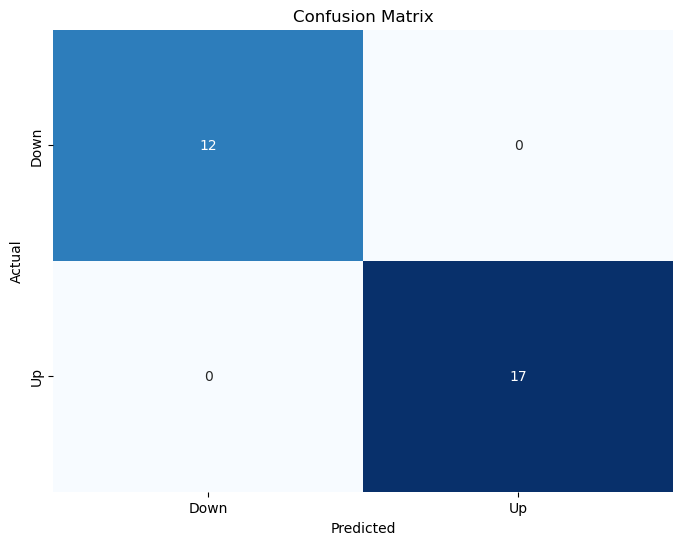

Fold 10 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        21

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[ 8  0]
 [ 0 21]]


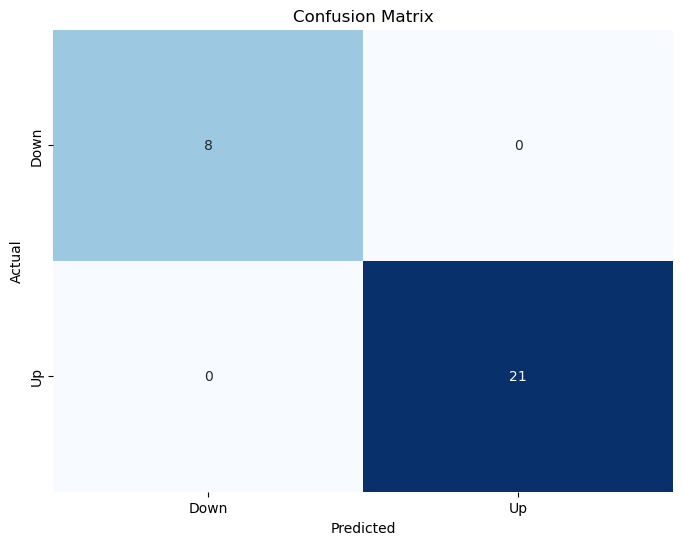

Fold 11 Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        18

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:
[[11  0]
 [ 0 18]]


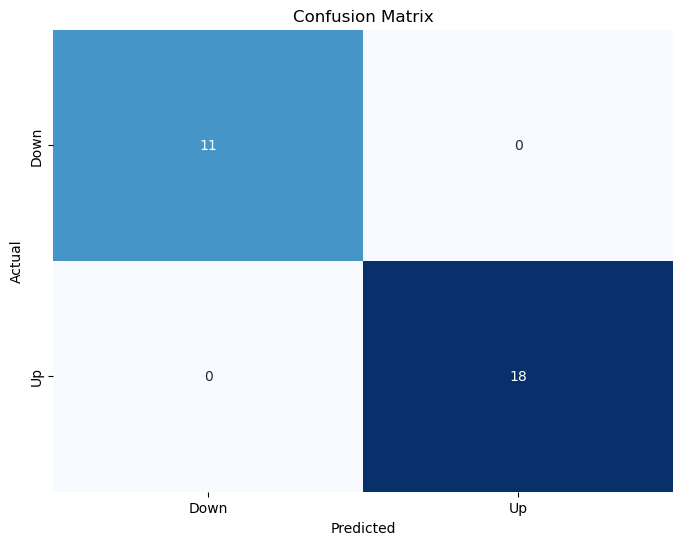

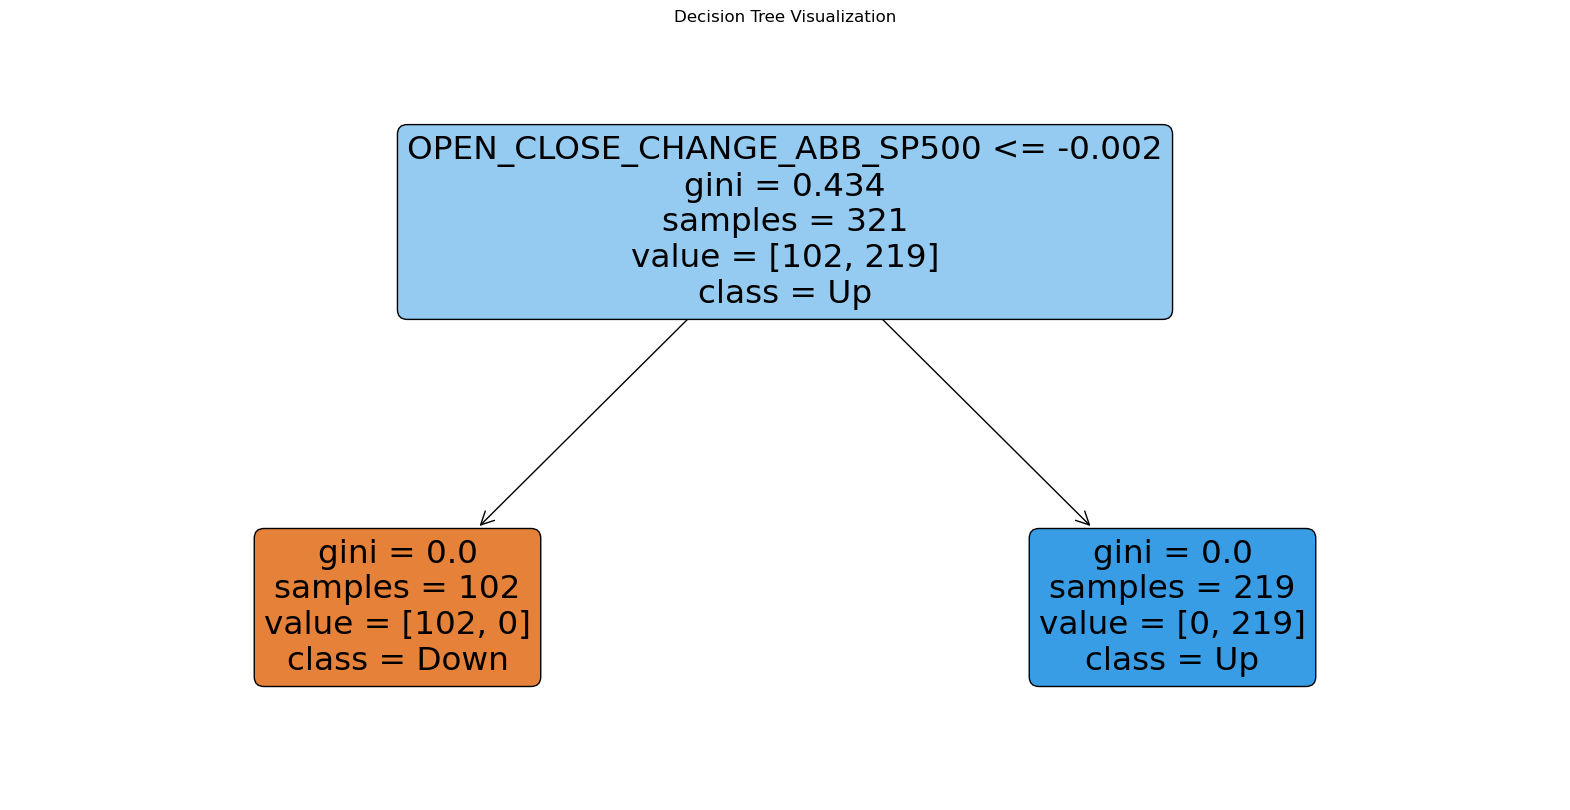

Average Accuracy over all folds: 0.98


In [487]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np

# Kolonner, der ikke skal bruges i modellen
columns_to_drop_sp500 = ['Date', 'Open SP500',
       'High SP500', 'Low SP500',
       'Close SP500',
       'Interest Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000', 'Close RUSSELL2000',
       'Volume RUSSELL2000', #'OPEN_CLOSE_CHANGE_ABB_SP500',
       'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000', 'SP500_Flagged',
       'Russell2000_Flagged', 'Next_Month_SP500', 'Next_Month_Russell2000']

# Fjern irrelevante kolonner og angiv den afhængige variabel
X = df_monthly_test.drop(columns=columns_to_drop_sp500)
y = df_monthly_test['SP500_Flagged']  # Målvariabel

# Brug TimeSeriesSplit til at dele data i træning og test
tscv = TimeSeriesSplit(n_splits=11)  # 5 fold som eksempel

# Initialiser Decision Tree-modellen
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# For at gemme resultater
accuracies = []
fold = 1

y_test = 0

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Træn modellen
    dt_model.fit(X_train, y_train)
    
    # Forudsige på testdata
    y_pred = dt_model.predict(X_test)
    
    # Evaluer modellen
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold} Accuracy: {accuracy:.2f}")
    fold += 1
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Visualisér confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualisér Decision Tree fra sidste fold
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Down', 'Up'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Udskriv gennemsnitsnøjagtighed
print(f"Average Accuracy over all folds: {np.mean(accuracies):.2f}")


In [488]:
# Forudsige på testdata
y_pred = dt_model.predict(X_test)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

# ML with DecisionTreeClassification

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.32      0.43        25
           1       0.71      0.91      0.80        45

    accuracy                           0.70        70
   macro avg       0.69      0.62      0.61        70
weighted avg       0.69      0.70      0.67        70


Confusion Matrix:
[[ 8 17]
 [ 4 41]]


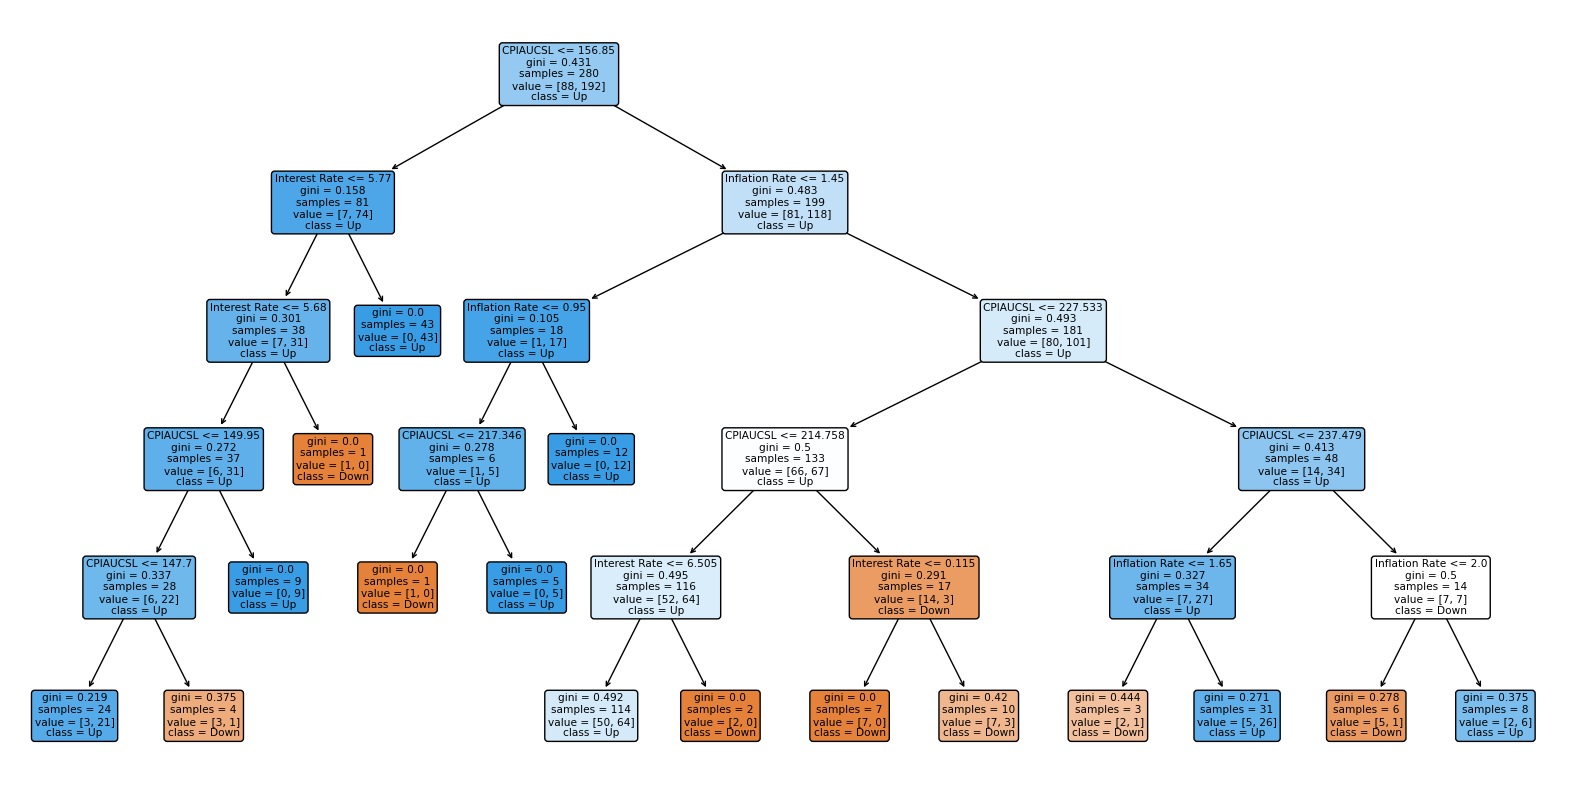

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

columns_to_drop_sp500 = ['Date', 'Open SP500',
       'High SP500', 'Low SP500',
       'Close SP500',
       #'Interest Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000', 'Close RUSSELL2000',
       'Volume RUSSELL2000', 'OPEN_CLOSE_CHANGE_ABB_SP500',
       'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000', 'SP500_Flagged',
       'Russell2000_Flagged', 'Next_Month_SP500', 'Next_Month_Russell2000']

# Antag, at 'Next_Month_SP500' er målvariablen (0 for fald, 1 for stigning)

# Fjern den afhængige variabel og eventuelle kolonner, der ikke er relevante for træningen
X = df_monthly_test.drop(columns=columns_to_drop_sp500)
y = df_monthly_test['SP500_Flagged']  # Afhængig variabel

# Split data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser Decision Tree-modellen
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Træn modellen
dt_model.fit(X_train, y_train)

# Forudsige på testdata
y_pred = dt_model.predict(X_test)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualisér Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Down', 'Up'], filled=True, rounded=True)
plt.show()

#### Now testing the model with the X_test to see the performance

Forudsagte værdier: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21

Confusion Matrix:
[[ 0  8]
 [ 0 13]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


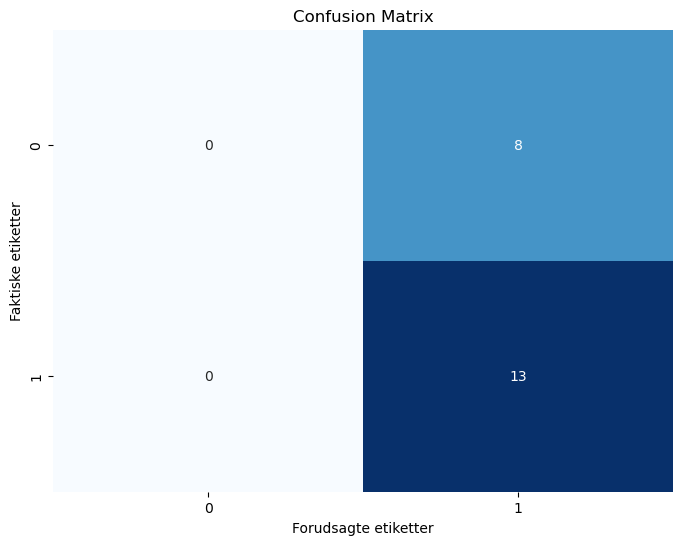

In [359]:
# Forudsige værdierne for X_test
y_pred = dt_model.predict(X_test)

# Udskriv de forudsagte værdier
print("Forudsagte værdier:", y_pred)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Klassifikationsrapport
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisering af Confusion Matrix som heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Forudsagte etiketter")
plt.ylabel("Faktiske etiketter")
plt.show()


## RandomForrestClassifier

In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialiser Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Træn modellen på træningsdata
rf_classifier.fit(X_train, y_train)

# Forudsig resultaterne på testdata
y_pred_rf = rf_classifier.predict(X_test)

# Evaluer modellen
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

# Udskriv classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Udskriv confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.86      0.46      0.60        13

    accuracy                           0.62        21
   macro avg       0.68      0.67      0.62        21
weighted avg       0.72      0.62      0.61        21


Confusion Matrix:
[[7 1]
 [7 6]]


In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Initialiser Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Definer cross-validation splits med TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=15)

# Beregn cross-validation scores
cv_scores = cross_val_score(rf_classifier, X, y, cv=tscv, scoring='accuracy')

# Udskriv nøjagtigheden for hver fold
print(f'Accuracy for each fold: {cv_scores}')

# Beregn gennemsnitlig nøjagtighed over alle fold
avg_accuracy_rf = cv_scores.mean()
print(f'Average Accuracy over all folds: {avg_accuracy_rf:.2f}')

# Træn og forudsig på de sidste testdata for at evaluere yderligere
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluer modellen
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nTest Set Accuracy: {accuracy_rf:.2f}')

# Udskriv classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Udskriv confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy for each fold: [0.95238095 0.66666667 0.47619048 0.23809524 0.38095238 0.47619048
 0.52380952 0.57142857 0.38095238 0.42857143 0.71428571 0.80952381
 0.28571429 0.61904762 0.61904762]
Average Accuracy over all folds: 0.54

Test Set Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.86      0.46      0.60        13

    accuracy                           0.62        21
   macro avg       0.68      0.67      0.62        21
weighted avg       0.72      0.62      0.61        21


Confusion Matrix:
[[7 1]
 [7 6]]


Forudsagte værdier: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21

Confusion Matrix:
[[ 0  8]
 [ 0 13]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


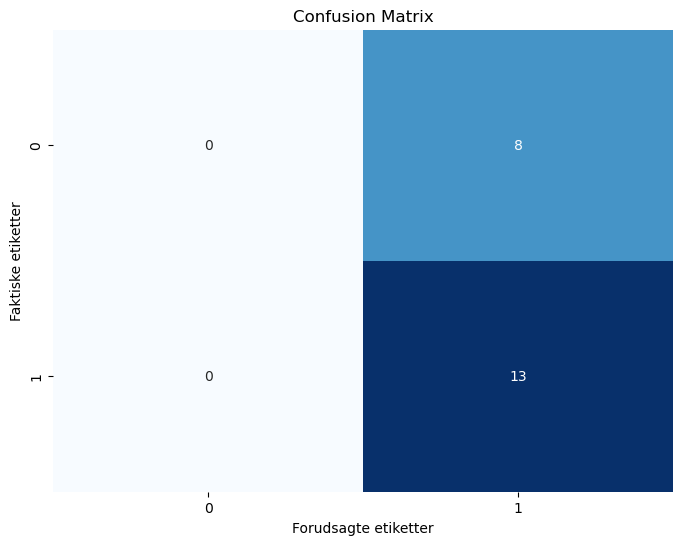

In [363]:
# Forudsige værdierne for X_test
y_pred = dt_model.predict(X_test)

# Udskriv de forudsagte værdier
print("Forudsagte værdier:", y_pred)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Klassifikationsrapport
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisering af Confusion Matrix som heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Forudsagte etiketter")
plt.ylabel("Faktiske etiketter")
plt.show()

#### GAUSIAN NAIVE MODELLEN

In [364]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Initialiser Naive Bayes Classifier
nb_classifier = GaussianNB()

# Definer cross-validation splits med TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=15)

# Beregn cross-validation scores
cv_scores_nb = cross_val_score(nb_classifier, X, y, cv=tscv, scoring='accuracy')

# Udskriv nøjagtigheden for hver fold
print(f'Accuracy for each fold: {cv_scores_nb}')

# Beregn gennemsnitlig nøjagtighed over alle fold
avg_accuracy_nb = cv_scores_nb.mean()
print(f'Average Accuracy over all folds: {avg_accuracy_nb:.2f}')

# Træn og forudsig på de sidste testdata for at evaluere yderligere
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluer modellen
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'\nTest Set Accuracy: {accuracy_nb:.2f}')

# Udskriv classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Udskriv confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Accuracy for each fold: [0.95238095 0.66666667 0.61904762 0.66666667 0.38095238 0.66666667
 0.42857143 0.33333333 0.33333333 0.38095238 0.52380952 0.47619048
 0.28571429 0.61904762 0.61904762]
Average Accuracy over all folds: 0.53

Test Set Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.67      0.77      0.71        13

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21


Confusion Matrix:
[[ 3  5]
 [ 3 10]]


Forudsagte værdier: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21

Confusion Matrix:
[[ 0  8]
 [ 0 13]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


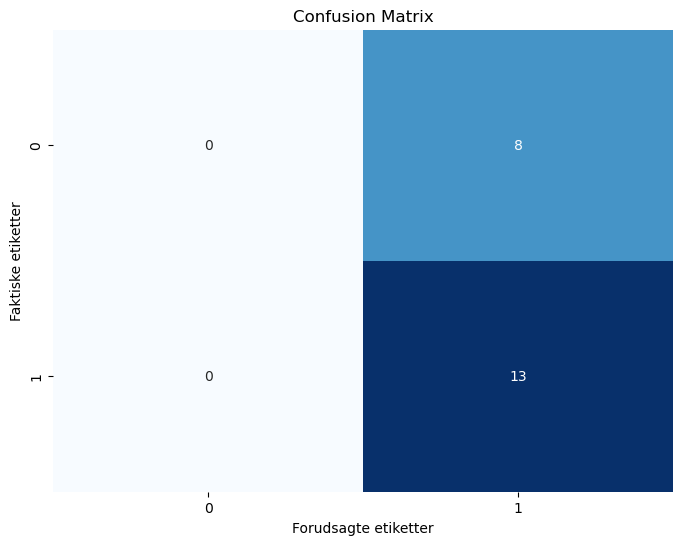

In [365]:
# Forudsige værdierne for X_test
y_pred = dt_model.predict(X_test)

# Udskriv de forudsagte værdier
print("Forudsagte værdier:", y_pred)

# Evaluer modellen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Klassifikationsrapport
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisering af Confusion Matrix som heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Forudsagte etiketter")
plt.ylabel("Faktiske etiketter")
plt.show()

In [335]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import numpy as np

# Initialiser Naive Bayes Classifier
nb_classifier = GaussianNB()

# Liste af forskellige antal splits, der skal testes
split_values = [3, 5, 7, 10, 15]

# Tom liste til at gemme gennemsnitlige nøjagtigheder for hver split
avg_accuracies = []

# Loop gennem de forskellige antal splits
for n_splits in split_values:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = cross_val_score(nb_classifier, X, y, cv=tscv, scoring='accuracy')
    avg_accuracy = np.mean(cv_scores)
    
    avg_accuracies.append(avg_accuracy)
    print(f'Average Accuracy with {n_splits} splits: {avg_accuracy:.2f}')

# Find det bedste antal splits
best_n_splits = split_values[np.argmax(avg_accuracies)]
print(f'\nBest number of splits: {best_n_splits}')

Average Accuracy with 3 splits: 0.52
Average Accuracy with 5 splits: 0.52
Average Accuracy with 7 splits: 0.55
Average Accuracy with 10 splits: 0.55
Average Accuracy with 15 splits: 0.57

Best number of splits: 15


Now we try splitting the data 

In [427]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Opdel dataset i træning og test
train = df_monthly_test.iloc[:-100]  # Træningsdata
test = df_monthly_test.iloc[-100:]    # Testdata

# Vælg uafhængige og afhængige variabler
X_train = train.drop(columns=columns_to_drop_sp500)  # Uafhængige variabler
y_train = train['SP500_Flagged']  # Afhængig variabel

X_test = test.drop(columns=columns_to_drop_sp500)  # Uafhængige variabler
y_test = test['SP500_Flagged']  # Afhængig variabel

# Initialiser Naive Bayes Classifier
nb_classifier = GaussianNB()

# Træn modellen på træningsdata
nb_classifier.fit(X_train, y_train)

# Forudsig resultaterne på testdata
y_pred_nb = nb_classifier.predict(X_test)

# Evaluer modellen
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb:.2f}')

# Udskriv classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Udskriv confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        37
           1       0.70      0.51      0.59        63

    accuracy                           0.55       100
   macro avg       0.56      0.56      0.55       100
weighted avg       0.60      0.55      0.56       100


Confusion Matrix:
[[23 14]
 [31 32]]


## Naive Bayes

In [314]:
# Drop Date column as it is not suitable for this
#df_movement = df_weekly.drop(columns='Date')
# Split data into features (X) and what we want to predict (y)
#X = df_movement.drop(columns=['OPEN_CLOSE_CHANGE_%_SP500_Flagged'])
#y = df_movement['OPEN_CLOSE_CHANGE_%_SP500_Flagged']

In [315]:
# Split the data into traning and test and train out chosen model (GaussianNB)
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#model = GaussianNB()
#model.fit(X_train, Y_train)

In [316]:
# Test the model score
#print(model.score(X_test, Y_test))
#print(model.score(X_train, Y_train))

In [317]:
#prediction = model.predict(X_test)
#prediction

In [318]:
#cmat = confusion_matrix(Y_test, prediction)
#print(cmat)
#print(classification_report(Y_test, prediction))

## Program for pridictions
Creating a program to predict if the prise will go up or down

In [456]:
import pandas as pd

def predict_stock_movement(year, month, model, df):
    # Opret en dato for den første dag i den ønskede måned
    date = f"{year}-{month:02d}-01"
    print(date)
    
    # Definer de relevante data
    predictors = ['Interest Rate', 'Inflation Rate', 'CPIAUCSL']
    
    # Hent den seneste data før den ønskede måned
    df_filtered = df[df['Date'] < date]
    $

    # Hvis der ikke er nok data til at lave en forudsigelse, returnér en fejlmeddelelse
    if len(df_filtered) == 0:
        return f"No data available before {date} for prediction."
    
    # Tag den sidste række af df_filtered for at bruge dens værdier til forudsigelsen
    last_data = df_filtered.iloc[-1]

    # Opret en ny DataFrame til forudsigelsen
    input_data = pd.DataFrame({col: [last_data[col]] for col in predictors})

    # Lav forudsigelsen
    prediction = model.predict(input_data)

    # Returnér resultatet
    return "Up" if prediction[0] == 1 else "Down"

# Eksempel på brug af funktionen
# Antag, at dt_model er den trænede model, og df_monthly_test er din DataFrame med data
result = predict_stock_movement(2017, 9, dt_model, df_monthly_test)
print(f"Prediction for {month} {year}: {result}")


2017-09-01
Prediction for 0 0: Up


In [470]:
import pandas as pd

def predict_next_month_stock_movement(model, df):
    # Hent den seneste data fra DataFrame
    last_data = df.iloc[-1].copy()  # Opret en kopi for at undgå at ændre originalen

    # Opret en ny DataFrame til forudsigelsen
    input_data = pd.DataFrame({
        'Interest Rate': [last_data['Interest Rate']],
        'Inflation Rate': [last_data['Inflation Rate']],
        'CPIAUCSL': [last_data['CPIAUCSL']],
    })

    # Lav forudsigelsen
    prediction = model.predict(input_data)

    # Bestem næste måned
    next_month_date = pd.to_datetime(last_data['Date']) + pd.DateOffset(months=1)
    next_month = next_month_date.strftime('%B %Y')  # Formater måned og år

    # Tjek forudsigelsen og returner resultatet
    movement = 'Op' if prediction[0] == 1 else 'Down'
    return f"Prediction for {next_month}: {movement}"

# Eksempel på brug af funktionen
next_prediction = predict_next_month_stock_movement(nb_classifier, df_monthly_test)
print(next_prediction)


Prediction for December 2016: Down


### another method taking the features as parameters

In [490]:
import pandas as pd

def predict_stock_movement(model, change):
    # Opret en ny DataFrame til forudsigelsen med de angivne værdier
    input_data = pd.DataFrame({
        'OPEN_CLOSE_CHANGE_ABB_SP500': [change]
    })

    # Lav forudsigelsen
    prediction = model.predict(input_data)

    # Tjek forudsigelsen og returner resultatet
    movement = 'Op' if prediction[0] == 1 else 'Ned'
    return f"Prediktion: Kursen vil gå {movement}"

# Eksempel på brug af funktionen med brugerdefinerede værdier
next_prediction = predict_stock_movement(dt_model, 100)
print(next_prediction)


Prediktion: Kursen vil gå Op
